In [1]:
from google.colab import files
uploaded = files.upload()

Saving Auto-3.csv to Auto-3.csv


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io

In [32]:
df = pd.read_csv(io.BytesIO(uploaded['Auto-3.csv']))

In [33]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_Highway,Weight,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6.0,265,23,4451,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4.0,200,31,2778,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4.0,200,29,3230,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6.0,270,28,3575,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6.0,225,24,3880,197


In [34]:
df.tail()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_Highway,Weight,Length
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,2.4,5.0,197,28,3450,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,2.3,5.0,242,26,3450,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,2.9,6.0,268,26,3653,190
426,Volvo,V40,Wagon,Europe,Front,26135,1.9,4.0,170,29,2822,180
427,Volvo,XC70,Wagon,Europe,All,35145,2.5,5.0,208,27,3823,186


In [35]:
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_Highway,Weight,Length
count,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.807512,215.885514,26.843458,3577.953271,186.362150
std,19431.716674,1.108595,1.558443,71.836032,5.741201,758.983215,14.357991
min,10280.000000,1.300000,3.000000,73.000000,12.000000,1850.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,24.000000,3104.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,26.000000,3474.500000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,29.000000,3977.750000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,66.000000,7190.000000,238.000000


In [36]:
# 1. Data Dimensionality
# Total number of vehicles.
total_vehicles = df.shape[0]

# Number of attributes (categories)
number_of_attributes = df.shape[1]

# Data types of the attributes
data_types = df.dtypes

# Checking for missing values
missing_values = df.isnull().sum()

# Printing the results
print(f"Total number of vehicles: {total_vehicles}")
print(f"Number of attributes: {number_of_attributes}")
print("\nData Types:")
print(data_types)
print("\nMissing Values:")
print(missing_values)


Total number of vehicles: 428
Number of attributes: 12

Data Types:
Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_Highway      int64
Weight           int64
Length           int64
dtype: object

Missing Values:
Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_Highway    0
Weight         0
Length         0
dtype: int64


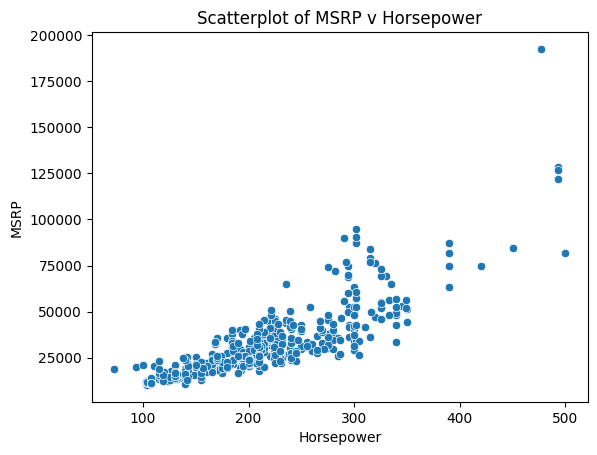

In [11]:
# Scatterplot of MSRP (Y) and Horsepower (X)
sns.scatterplot(data=df, x='Horsepower', y='MSRP')
plt.title('Scatterplot of MSRP v Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MSRP')
plt.show()

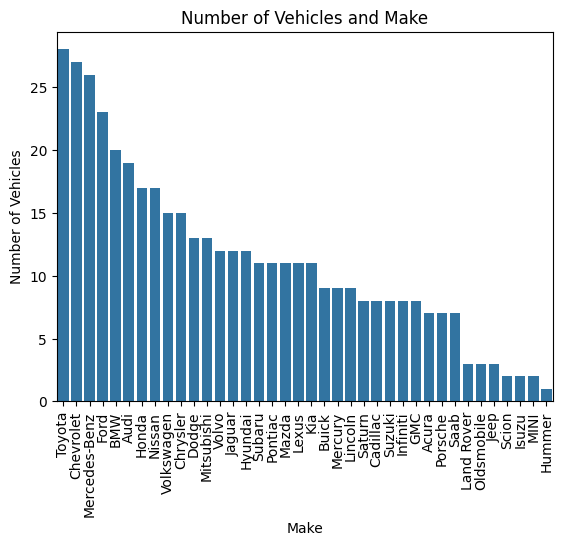

In [12]:
# Bar plot of Number of vehicles (Y) and Make (X)
vehicle_counts_by_make = df['Make'].value_counts()
sns.barplot(x=vehicle_counts_by_make.index, y=vehicle_counts_by_make.values)
plt.xticks(rotation=90)
plt.title('Number of Vehicles and Make')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.show()

Which Make has the greatest number of vehicles?


*   Toyota has the greatest number of vehicles



In [13]:
# Normalize and Standardize the Horsepower variable. Make sure the entire results print out. Answer the following questions (5pts):
# How do the transformation results differ?
# Which transformation method do you prefer and why?

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [38]:
#Normalized Horsepower
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df[['Horsepower']])

normalized_df = pd.DataFrame(normalized_data, columns=['Normalized Horsepower'])
pd.set_option('display.max_rows', None)
print("Original and Normalized Horsepower values:")
print(pd.concat([df[['Horsepower']], normalized_df], axis=1))

Original and Normalized Horsepower values:
     Horsepower  Normalized Horsepower
0           265               0.449649
1           200               0.297424
2           200               0.297424
3           270               0.461358
4           225               0.355972
5           225               0.355972
6           290               0.508197
7           170               0.227166
8           170               0.227166
9           220               0.344262
10          220               0.344262
11          220               0.344262
12          220               0.344262
13          220               0.344262
14          220               0.344262
15          220               0.344262
16          250               0.414520
17          300               0.531616
18          330               0.601874
19          340               0.625293
20          450               0.882904
21          180               0.250585
22          225               0.355972
23          250      

In [39]:
#Standardized Horsepower
scaler = StandardScaler()
standardized_horsepower = scaler.fit_transform(horsepower)

standardized_df = pd.DataFrame(standardized_horsepower, columns=['Standardized Horsepower'])

pd.set_option('display.max_rows', None)
print(pd.concat([horsepower, standardized_df], axis=1))

     Horsepower  Standardized Horsepower
0           265                 0.684503
1           200                -0.221395
2           200                -0.221395
3           270                 0.754187
4           225                 0.127028
5           225                 0.127028
6           290                 1.032925
7           170                -0.639501
8           170                -0.639501
9           220                 0.057343
10          220                 0.057343
11          220                 0.057343
12          220                 0.057343
13          220                 0.057343
14          220                 0.057343
15          220                 0.057343
16          250                 0.475450
17          300                 1.172294
18          330                 1.590400
19          340                 1.729769
20          450                 3.262826
21          180                -0.500132
22          225                 0.127028
23          250 

The transformations applied to the Horsepower attribute include normalization (scaling to a range between 0 and 1 using min-max scaling) in the Normalized Horsepower column and standardization (converting to z-scores with mean 0 and standard deviation 1) in the Standardised Horsepower column.

I prefer normalization because it scales the data to a range between 0 and 1, making it easier to interpret and compare across different features. Additionally, normalization avoids negative values, providing a clearer understanding of the relative magnitudes of the data and facilitating a more intuitive analysis